In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

### Завантажуємо файл і переглядаємо

In [54]:
file_name = "multiple.wav"
rate, data = wavfile.read(file_name)
data = data[:, 1] # right channel only

length = data.size

print("Type: ", data.dtype)
print("Sample size: ", length)
print("Sample rate: ", rate)

ipd.Audio(data, rate=rate)

Type:  int32
Sample size:  1224704
Sample rate:  44100


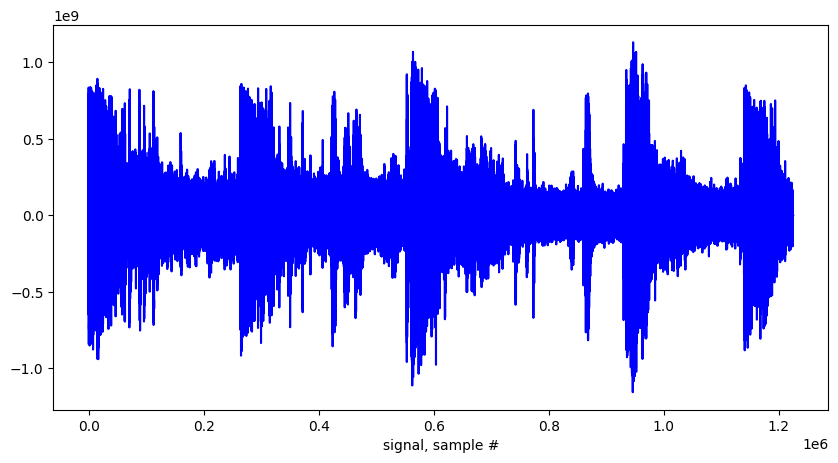

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(data, 'b')
plt.xlabel("signal, sample #")
plt.show()

Ділимо вхідний сигнал на кусочки, і в кожному рахуємо сумму квадратів сигналу

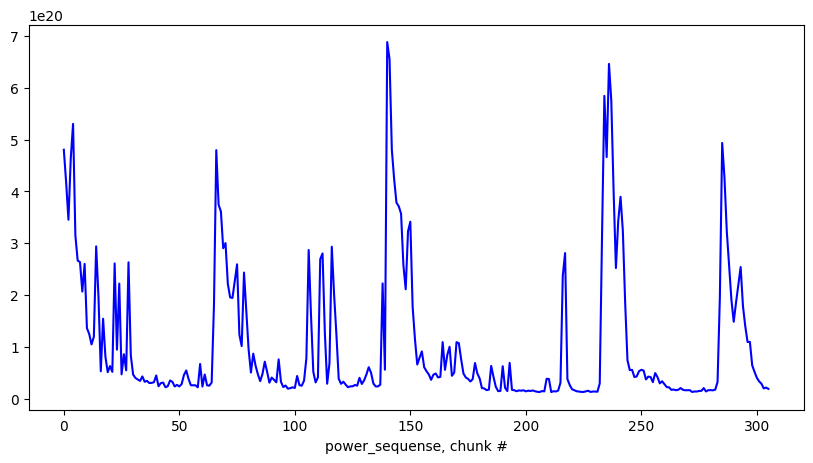

In [61]:
energy = data.astype(float) * data

POWER_CHUNK_SIZE = 4000
chunks_n = length // POWER_CHUNK_SIZE
chunks = energy[:chunks_n * POWER_CHUNK_SIZE].reshape(length // POWER_CHUNK_SIZE, POWER_CHUNK_SIZE)
power_sequense = chunks.sum(-1)

plt.figure(figsize=(10, 5))
plt.plot(power_sequense, 'b')
plt.xlabel("power_sequense, chunk #")
plt.show()

Тепер рухаємося вікном


In [84]:
from numpy.lib.stride_tricks import sliding_window_view

WINDOW_SIZE = 30
windows = sliding_window_view(power_sequense, window_shape = WINDOW_SIZE)
print(windows[0])

[4.80519793e+20 4.17549588e+20 3.45365249e+20 4.63303923e+20
 5.30392407e+20 3.14861442e+20 2.66475802e+20 2.63587841e+20
 2.06710468e+20 2.60146892e+20 1.36048866e+20 1.24697080e+20
 1.04718567e+20 1.19380397e+20 2.93941655e+20 1.96777454e+20
 5.27637449e+19 1.54271762e+20 8.09712846e+19 5.09924979e+19
 6.28909761e+19 5.16567638e+19 2.60964322e+20 9.45985767e+19
 2.22029923e+20 4.69290395e+19 8.57342861e+19 5.46182794e+19
 2.63216697e+20 8.31668246e+19]


В кожному вікні нормалізуємо power_sequence

In [90]:
mn, mx = windows.min(axis=1, keepdims=True), windows.max(axis=1, keepdims=True)
windows = (windows - mn) / (mx - mn)
print(windows[0])

[0.89684303 0.76659489 0.61728815 0.86123357 1.         0.5541938
 0.45411251 0.44813902 0.33049335 0.44102173 0.18433625 0.16085612
 0.11953238 0.14985904 0.51092313 0.30994781 0.01206856 0.22202866
 0.07041329 0.00840489 0.03301581 0.00977887 0.44271251 0.0986001
 0.36218025 0.         0.08026512 0.01590449 0.44737135 0.07495456]


Рахуємо стандартне відхилення в вікні

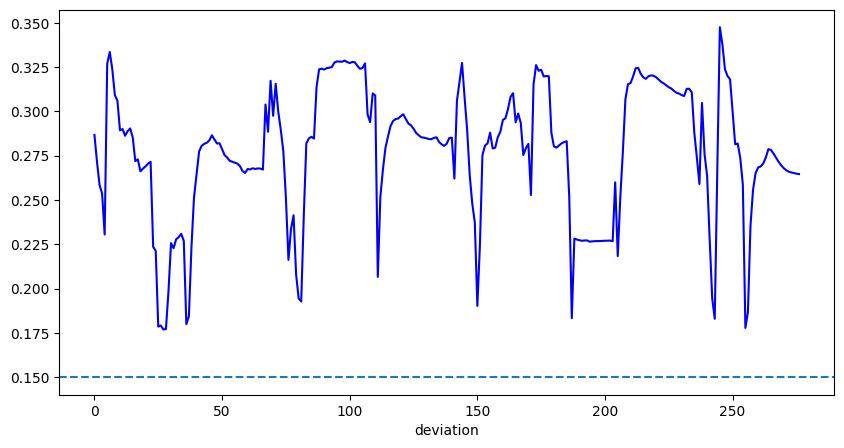

In [97]:
deviation = np.std(windows, axis=1)
TRESHOLD = 0.15

plt.figure(figsize=(10, 5))
plt.plot(deviation, 'b')
plt.axhline(y=TRESHOLD, linestyle='--')
plt.xlabel("deviation")
plt.show()

І отут у них вийшло, що стандартне відхилення повтається біля 0.25, а в моменти пострілів падає суттєво нижче 0.1. В мене поки так не вийшло.